C:\Users\Hp\AppData\Local\Temp\ipykernel_16084\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_16084\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_16084\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.append(class_df, ignore_index=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_16084\182091648.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = train_data.

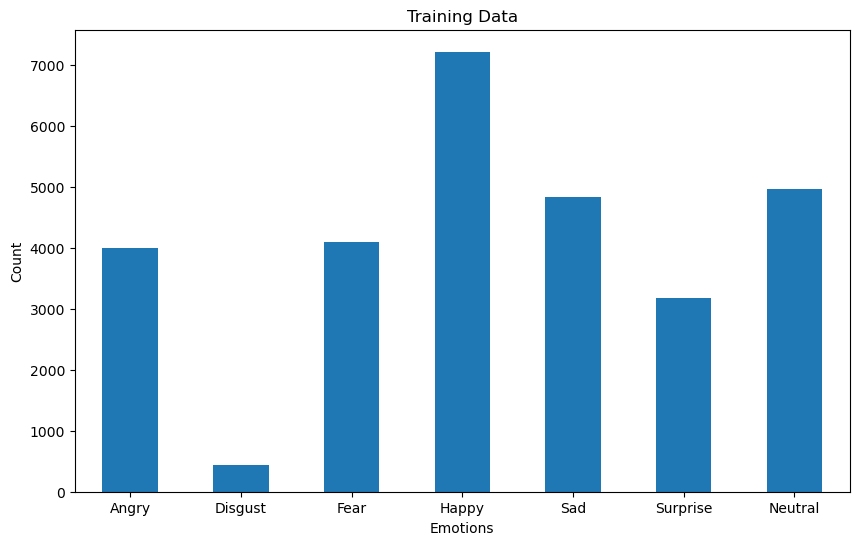

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set the path to your "train" folder containing subfolders 0 to 6 
data_path = 'C:/Users/Hp/Documents/Downloads/archive/data/train/'

# List all subfolders (classes)
class_folders = [str(i) for i in range(7)]

# Initialize an empty DataFrame to store the training data .Create an empty Pandas DataFrame with a column named "emotion" to store the training data. You might need to adjust this depending on your actual data structure.
train_data = pd.DataFrame(columns=['emotion'])  #  DataFrame has an "emotion" column

# Load data from each class folder
for class_folder in class_folders:
    class_path = os.path.join(data_path, class_folder)
    
    # It reads the files ( they are images) in the current class folder and stores the list of file names in class_files.
    class_files = os.listdir(class_path)
    
    # Create a DataFrame for this class and set the "emotion" column .This can be useful for organizing and labeling data during the data preparation phase in machine learning tasks.
    class_df = pd.DataFrame({'emotion': [int(class_folder)] * len(class_files)})
    
    # Append the class data to the training data
    train_data = train_data.append(class_df, ignore_index=True)

# emotion labels (if you want to customize them)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
setup_axe(axes, train_data, 'Training Data')
plt.show()


In [21]:
import numpy as np # linear algebra array object similar to python
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [23]:
#Label extraction on training data
import os
labels = []
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/0'):
    labels.append(0)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/1'):
    labels.append(1)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/2'):
    labels.append(2)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/3'):
    labels.append(3)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/4'):
    labels.append(4)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/5'):
    labels.append(5)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/train/6'):
    labels.append(6)
   

In [25]:
#feature extraction on training data
import cv2
#loc1 = '#feature extraction on training data
import cv2
loc1 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/0'
loc2 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/1'
loc3 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/2'
loc4 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/3'
loc5 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/4'
loc6 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/5'
loc7 = 'C:/Users/Hp/Documents/Downloads/archive/data/train/6'
features = []
from tqdm import tqdm #tqdm = progress .making it easier to monitor the progress of loops and iterations.
for i in tqdm(os.listdir(loc1)):
    features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    features.append(cv2.imread(os.path.join(loc7,i),0))
    # uses a list of directory paths [loc1, loc2, ..., loc7]
    # .For each directory (loc), the loop iterates over the contents of the directory.

100%|██████████| 4965/4965 [00:00<00:00, 4987.61it/s]


In [ ]:
#Each line corresponds to one loop iteration, and the information displayed includes the progress percentage, a graphical representation of progress with the filled squares 

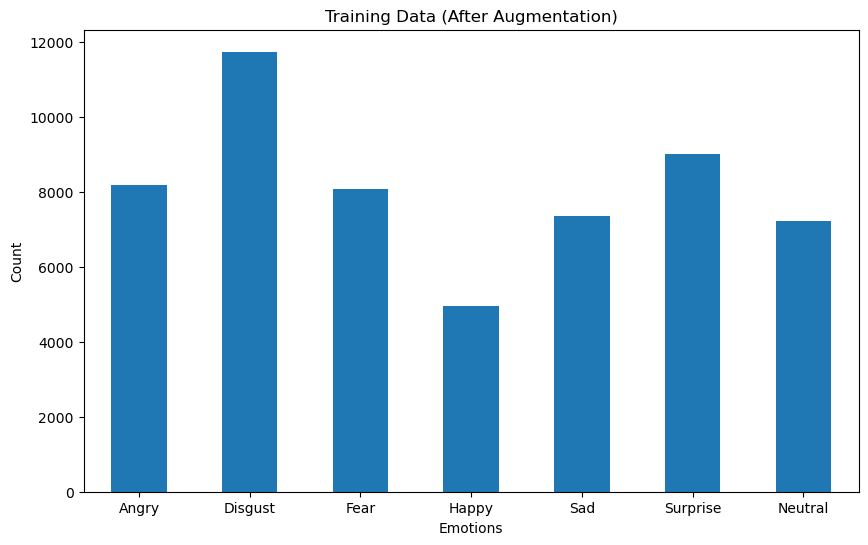

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
# Import ImageDataGenerator from TensorFlow/Keras TensorFlow is an open-source machine learning framework 
# Set the path to your "train" folder containing subfolders 0 to 6
data_path = 'C:/Users/Hp/Documents/Downloads/archive/data/train/'

# List all subfolders (classes)
class_folders = [str(i) for i in range(7)]

# Initialize a dictionary to store image counts for each class
class_counts = {}

# Calculate the maximum count of images in a class
max_class_count = 0

# Load data and count images for each class
for class_folder in class_folders:  #Iterates over class folders.
    class_path = os.path.join(data_path, class_folder)#Constructs the full path to the current class folder.
    
    # Read the files in the class folder (assuming they are images)
    class_files = os.listdir(class_path)
    
    # Store the count of images for this class
    class_count = len(class_files)
    class_counts[class_folder] = class_count#Counts the number of images in the current class.
    
    # Update the maximum class count if needed
    
    if class_count > max_class_count:
        max_class_count = class_count

# Augmentation parameters
num_augmentations = max_class_count - min(class_counts.values())

# Augment the data for classes with fewer images
augmented_data = []

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_folder, class_count in class_counts.items():
    if class_count < max_class_count:
        # Load images from the class folder
        class_path = os.path.join(data_path, class_folder)
        class_images = [cv2.imread(os.path.join(class_path, image_file), 0) for image_file in os.listdir(class_path)]

        # Augment the data for this class to match the maximum count
        augment_count = max_class_count - class_count
        for i in range(augment_count):
            # Add an extra dimension for channels
            augmented_images = datagen.flow(np.array(class_images)[:, :, :, np.newaxis], batch_size=1)  
            
            augmented_image = augmented_images.next()
            augmented_data.append((int(class_folder), augmented_image[0]))

# Combine the original and augmented data
original_data = [(int(class_folder), image) for class_folder, class_count in class_counts.items() for image in class_images]
combined_data = original_data + augmented_data

# Create a DataFrame
train_data = pd.DataFrame(combined_data, columns=['emotion', 'image'])

# Your emotion labels (if you want to customize them)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title):
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))
setup_axe(axes, train_data, 'Training Data (After Augmentation)')
plt.show()


In [30]:
#Label extraction on testing data
import os
labels_test = []
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/0'):
    labels_test.append(0)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/1'):
    labels_test.append(1)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/2'):
    labels_test.append(2)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/3'):
    labels_test.append(3)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/4'):
    labels_test.append(4)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/5'):
    labels_test.append(5)
for i in os.listdir('C:/Users/Hp/Documents/Downloads/archive/data/test/6'):
    labels_test.append(6)

In [31]:
#feature extraction on testing data
import cv2
loc1 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/0'
loc2 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/1'
loc3 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/2'
loc4 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/3'
loc5 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/4'
loc6 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/5'
loc7 = 'C:/Users/Hp/Documents/Downloads/archive/data/test/6'
test_features = []
from tqdm import tqdm
for i in tqdm(os.listdir(loc1)):
    test_features.append(cv2.imread(os.path.join(loc1,i),0))
    
for i in tqdm(os.listdir(loc2)):
    test_features.append(cv2.imread(os.path.join(loc2,i),0))
    
for i in tqdm(os.listdir(loc3)):
    test_features.append(cv2.imread(os.path.join(loc3,i),0))
    
for i in tqdm(os.listdir(loc4)):
    test_features.append(cv2.imread(os.path.join(loc4,i),0))
    
for i in tqdm(os.listdir(loc5)):
    test_features.append(cv2.imread(os.path.join(loc5,i),0))
    
for i in tqdm(os.listdir(loc6)):
    test_features.append(cv2.imread(os.path.join(loc6,i),0))
    
for i in tqdm(os.listdir(loc7)):
    test_features.append(cv2.imread(os.path.join(loc7,i),0))
    #The code iterates through each directory (loc1 to loc7) containing testing images.
#For each image in a directory, it reads the image 
#The read image is then appended to the test_features list.
#The tqdm library creates progress bars for each iteration, providing visual feedback on the progress of the feature extraction.
#This code assumes that the testing data is organized into different directories, each corresponding to a different class or category. The grayscale images are read and collected in the test_features list, which can be used for further processing or analysis in a machine learning model.

100%|██████████| 626/626 [00:00<00:00, 1949.05it/s]


In [32]:
import pandas as pd
train_data = pd.DataFrame()
test_data = pd.DataFrame()

In [33]:
train_data['emotion'] = labels
train_data['pixel_values'] = features
test_data['emotion'] = labels_test
test_data['pixel_values'] = test_features

In [34]:
train_data.head() #quick overview of the DataFrame's structure and content.

emotion                                       pixel_values
0        0  [[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ...
1        0  [[151, 150, 147, 155, 148, 133, 111, 140, 170,...
2        0  [[30, 24, 21, 23, 25, 25, 49, 67, 84, 103, 120...
3        0  [[32, 25, 19, 55, 46, 35, 34, 48, 92, 101, 33,...
4        0  [[223, 218, 199, 191, 202, 205, 194, 133, 103,...

In [35]:
test_data.head()

emotion                                       pixel_values
0        0  [[170, 118, 101, 88, 88, 75, 78, 82, 66, 74, 6...
1        0  [[138, 142, 66, 80, 87, 92, 97, 99, 88, 73, 72...
2        0  [[245, 245, 239, 122, 144, 101, 33, 37, 84, 13...
3        0  [[215, 218, 222, 220, 221, 226, 218, 215, 216,...
4        0  [[58, 52, 55, 62, 59, 42, 40, 45, 43, 39, 40, ...

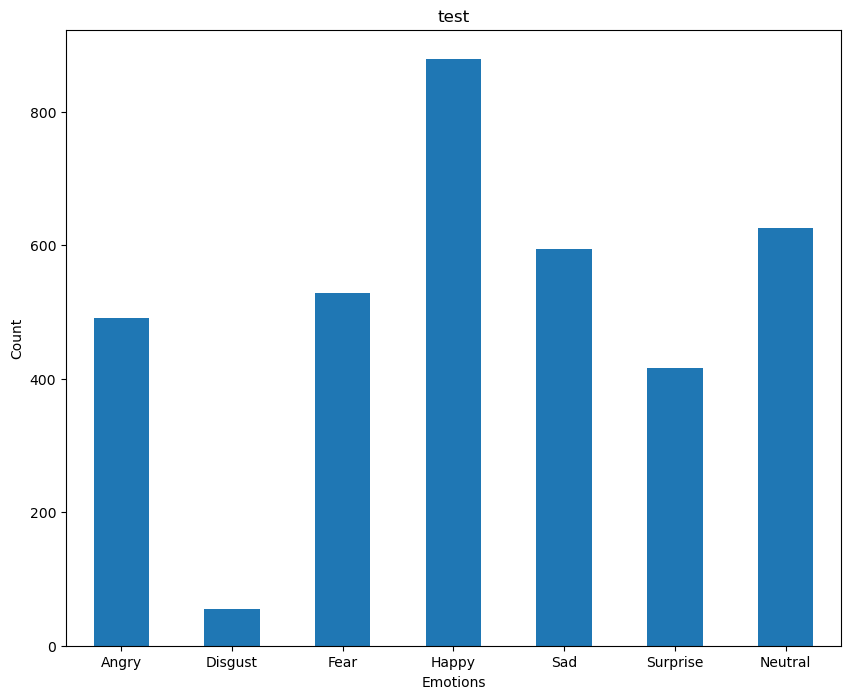

In [36]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

def setup_axe(axe, df, title): #it creates a bar plot of the count of each emotion in the 'emotion' column of the DataFrame.
    df['emotion'].value_counts(sort=False).plot(ax=axe, kind='bar', rot=0)
    axe.set_xticklabels(emotion_labels)
    axe.set_xlabel("Emotions")
    axe.set_ylabel("Count")
    axe.set_title(title)

import matplotlib.pyplot as plt   
fig, axes = plt.subplots(1, 1, figsize=(10, 8))   # Use the setup_axe function to create a bar plot for test_data
setup_axe(axes, test_data, 'test')  # Removed the setup for train_data
plt.show()


In [37]:
import numpy as np
from tensorflow.keras.utils import to_categorical  
# Reshape features arrays to match the input shape 

features = np.array(features).reshape(-1, 48, 48, 1)
test_features = np.array(test_features).reshape(-1, 48, 48, 1)
# Normalize pixel values to the range [0, 1]

features = features / 255
test_features = test_features / 255
# Convert emotion labels to categorical one-hot encoding
#Converting emotion labels to categorical one-hot encoding involves representing each emotion label as a binary vector where only one element is "hot" (set to 1), and the rest are "cold" (set to 0). 
labels = to_categorical(labels)  # Use to_categorical from tensorflow.keras.utils
labels_test = to_categorical(labels_test)


In [38]:
print('Training features shape ',features.shape)
print('Training labels shape',labels.shape)
print('Testing features shape ',test_features.shape)
print('Testing labels shape',labels_test.shape)

Training features shape  (28709, 48, 48, 1)
Training labels shape (28709, 7)
Testing features shape  (3589, 48, 48, 1)
Testing labels shape (3589, 7)


In [39]:
# image classification
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from sklearn.metrics import accuracy_score



In [40]:
# image classification 
model = Sequential() #Sequential() creates a linear stack of layers for building the neural network model.
input_shape = (48,48,1)#Conv2D adds 2D convolutional layers for feature extraction from input images.
model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())#BatchNormalization() normalizes and stabilizes activations.
model.add(BatchNormalization())#MaxPooling2D adds 2D max pooling layers for down-sampling feature maps.
model.add(MaxPooling2D(pool_size=(2, 2)))
#MaxPooling2D adds 2D max pooling layers for down-sampling feature maps. padding= adding extra pixel
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#Flatten() flattens the output for feeding into fully connected layers.
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(7))
model.add(Activation('softmax'))
  
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


In [41]:
#monitor validation loss 
#patience=10: Waits for 10 epochs with no improvement before stopping.
#restore_best_weights=True: Restores the model weights from the epoch with the best value of the monitored quantity.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience = 10, mode = 'min', restore_best_weights=True)

In [42]:
# model train 
history = model.fit(x=features, 
            y=labels, 
            batch_size=64,
            steps_per_epoch=len(features) / 64,
            epochs=30, 
            verbose=1, 
            callbacks = [es],
            validation_data=(test_features,labels_test),
            shuffle=True)

# Save the trained model to a file
model.save('augmented_fer2013_emotion_model.h5')



Epoch 1/30
448/448 [==============================] - 1577s 3s/step - loss: 1.6539 - accuracy: 0.3623 - val_loss: 1.4842 - val_accuracy: 0.4121
Epoch 2/30
448/448 [==============================] - 1584s 4s/step - loss: 1.3074 - accuracy: 0.5032 - val_loss: 1.3102 - val_accuracy: 0.4993
Epoch 3/30
448/448 [==============================] - 1467s 3s/step - loss: 1.1355 - accuracy: 0.5710 - val_loss: 1.1775 - val_accuracy: 0.5495
Epoch 4/30
448/448 [==============================] - 1458s 3s/step - loss: 1.0061 - accuracy: 0.6265 - val_loss: 1.1144 - val_accuracy: 0.5790
Epoch 5/30
448/448 [==============================] - 1473s 3s/step - loss: 0.8889 - accuracy: 0.6682 - val_loss: 1.0909 - val_accuracy: 0.6096
Epoch 6/30
448/448 [==============================] - 1455s 3s/step - loss: 0.7532 - accuracy: 0.7247 - val_loss: 1.1543 - val_accuracy: 0.5949
Epoch 7/30
448/448 [==============================] - 1786s 4s/step - loss: 0.6001 - accuracy: 0.7833 - val_loss: 1.2025 - val_accuracy:

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


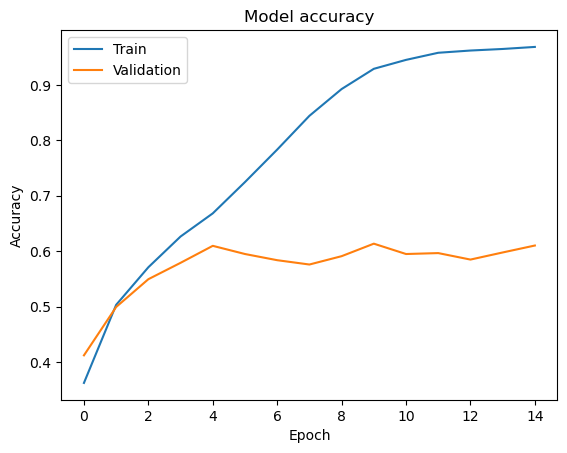

In [43]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


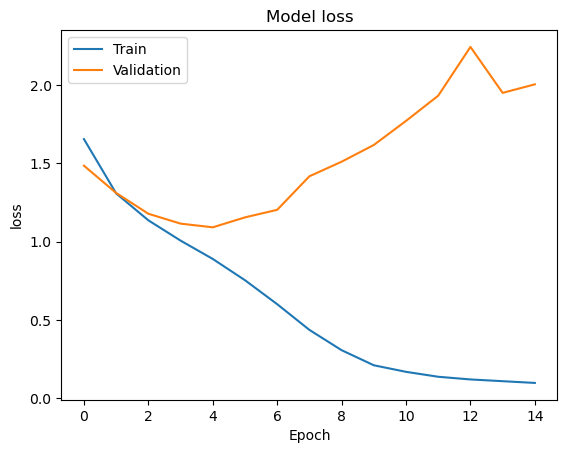

In [44]:
# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [45]:
test_true = np.argmax(labels_test, axis=1)
test_pred = np.argmax(model.predict(test_features), axis=1)
print("CNN Model Accuracy on testing data: {:.4f}".format(accuracy_score(test_true, test_pred)))

113/113 [==============================] - 49s 384ms/step
CNN Model Accuracy on testing data: 0.6096


In [46]:
from sklearn import metrics
# Predicted values
y_pred = test_pred
# Actual values
y_act = test_true 
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(y_act, y_pred, labels=[0,1,2,3,4,5,6]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_act, y_pred, labels=[0,1,2,3,4,5,6]))

[[242   7  28  50  72  19  73]
 [ 13  25   3   5   6   1   2]
 [ 59   3 165  50 102  77  72]
 [ 18   0   7 761  33  23  37]
 [ 55   2  43  75 282  14 123]
 [  8   0  22  37  10 320  19]
 [ 39   4  23  62  95  10 393]]
              precision    recall  f1-score   support

           0       0.56      0.49      0.52       491
           1       0.61      0.45      0.52        55
           2       0.57      0.31      0.40       528
           3       0.73      0.87      0.79       879
           4       0.47      0.47      0.47       594
           5       0.69      0.77      0.73       416
           6       0.55      0.63      0.58       626

    accuracy                           0.61      3589
   macro avg       0.60      0.57      0.57      3589
weighted avg       0.60      0.61      0.60      3589



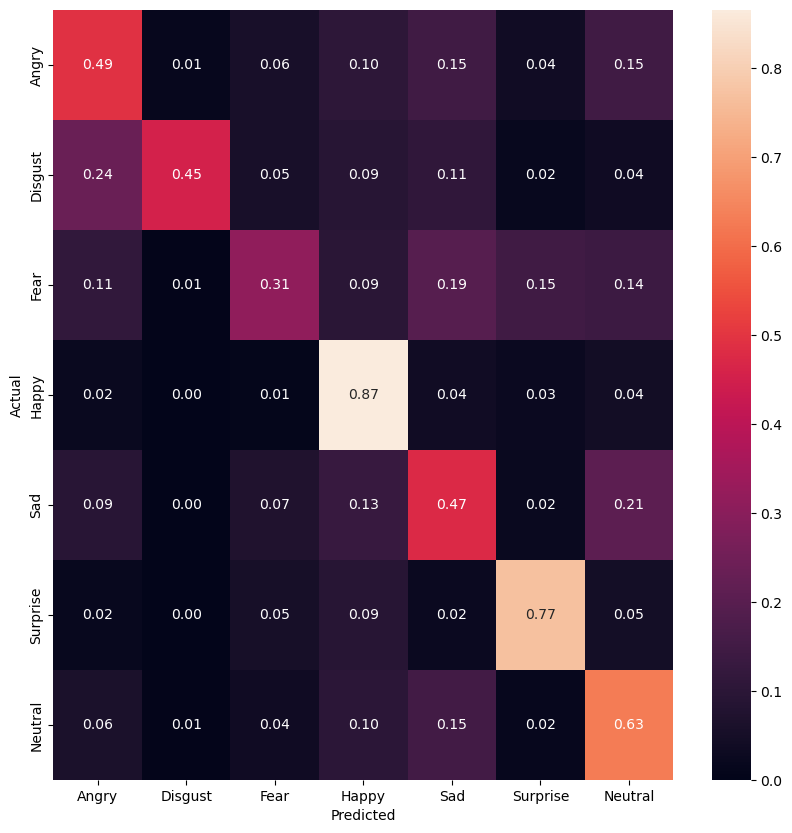

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_act, y_pred)
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [48]:
# a tuple containing string labels ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral'
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
#arange function to create an array of integers from 0 to one less than the length of objects
y_pos = np.arange(len(objects))
#This array represents the positions on the y-axis where you might want to place data points or bars in a plot
print(y_pos)

[0 1 2 3 4 5 6]


In [49]:
import matplotlib.pyplot as plt
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()

In [50]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
def predict_image(pic):
    img = image.load_img(pic, grayscale=True, target_size=(48, 48))
    show_img=image.load_img(pic, grayscale=False, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    x /= 255

    custom = model.predict(x)
    
    emotion_analysis(custom[0])

    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    plt.gray()
    plt.imshow(show_img)
    plt.show()

    m=0.000000000000000000001
    a=custom[0]
    for i in range(0,len(a)):
        if a[i]>m:
            m=a[i]
            ind=i
        
    print('Expression Prediction:',objects[ind])

C:\Users\Hp\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 5s 5s/step


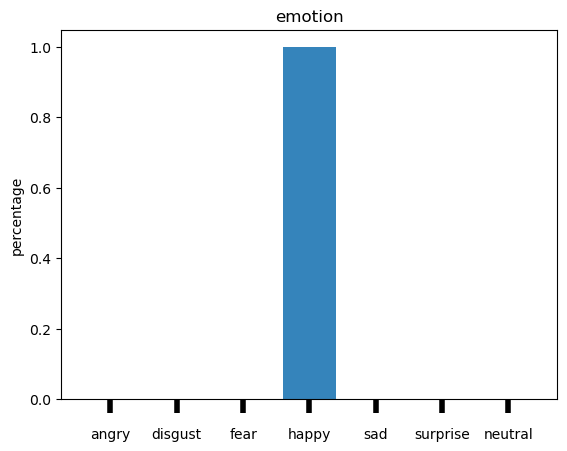

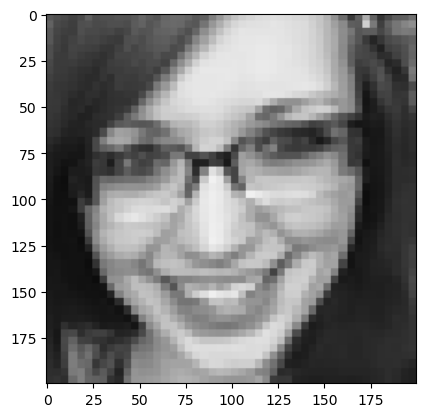

Expression Prediction: happy


In [51]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/3/28713.png')

1/1 [==============================] - 4s 4s/step


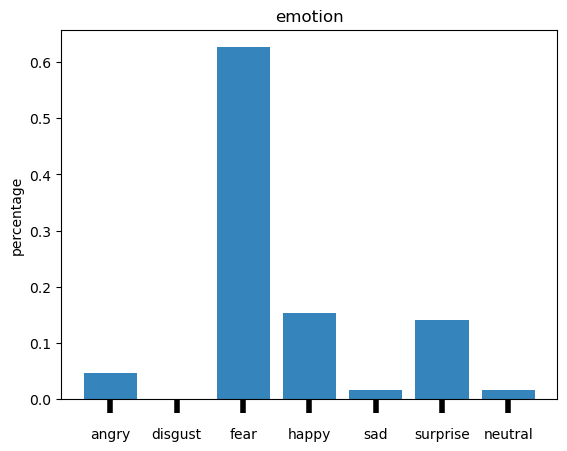

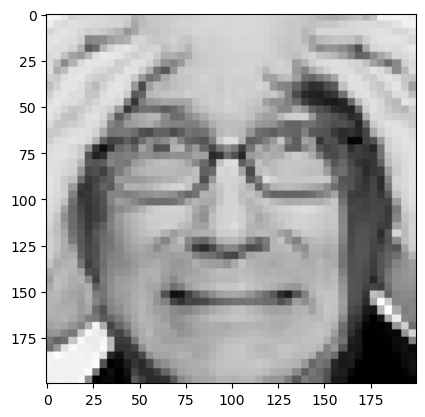

Expression Prediction: fear


In [52]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/2/29026.png')

1/1 [==============================] - 5s 5s/step


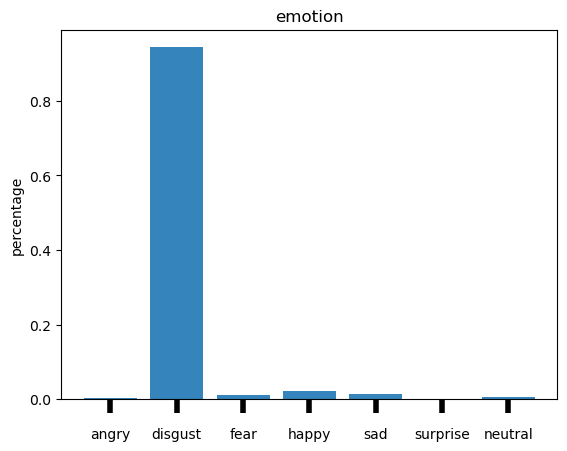

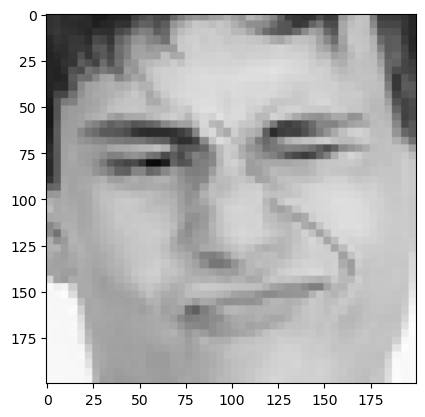

Expression Prediction: disgust


In [53]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/1/28953.png')

1/1 [==============================] - 2s 2s/step


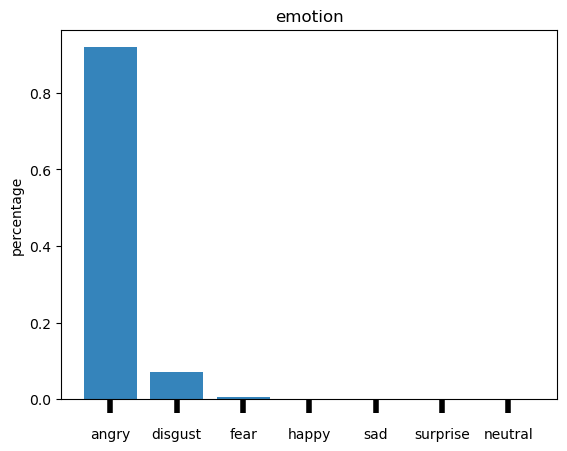

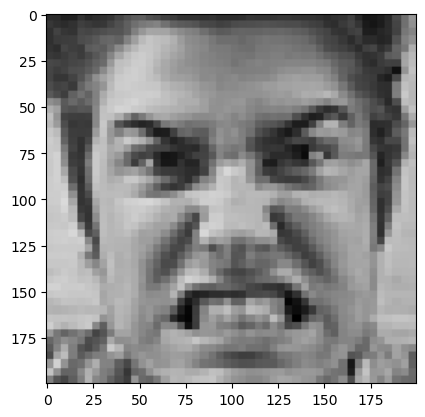

Expression Prediction: angry


In [54]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/0/28749.png')

1/1 [==============================] - 3s 3s/step


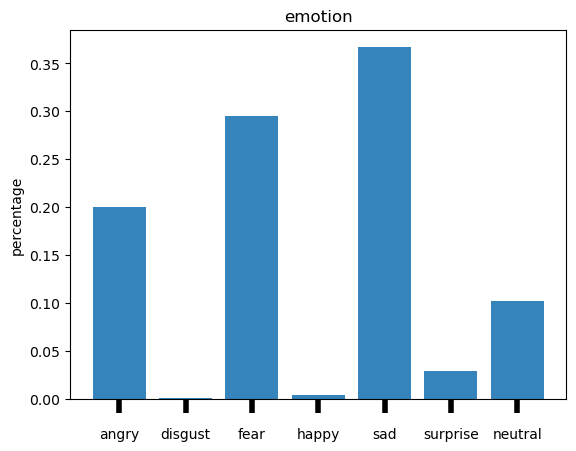

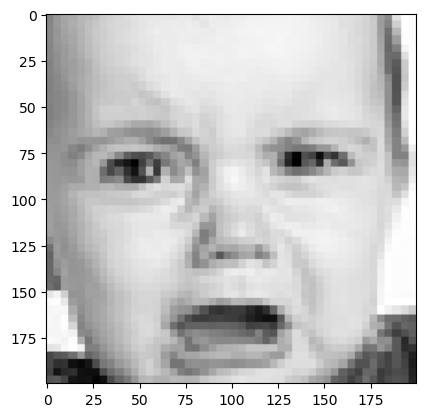

Expression Prediction: sad


In [55]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/4/28865.png')

1/1 [==============================] - 2s 2s/step


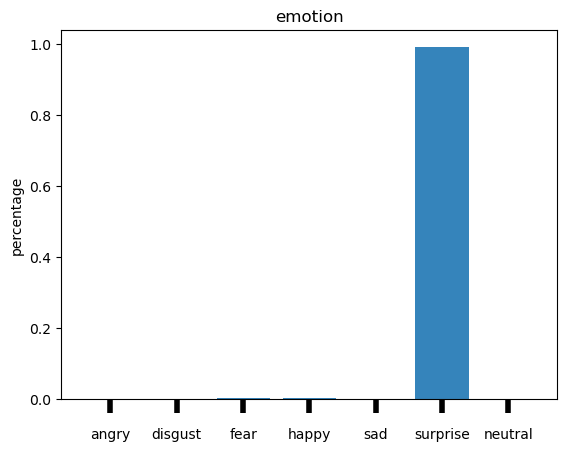

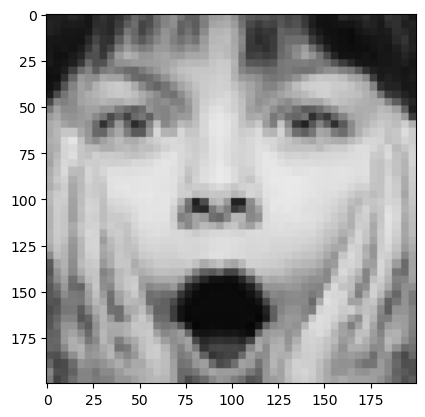

Expression Prediction: surprise


In [56]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/5/28829.png')

1/1 [==============================] - 2s 2s/step


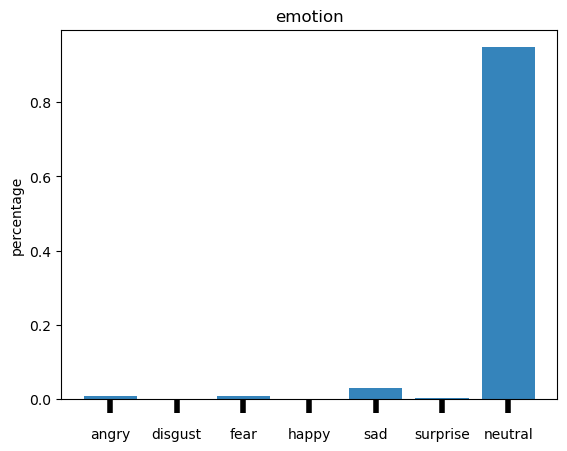

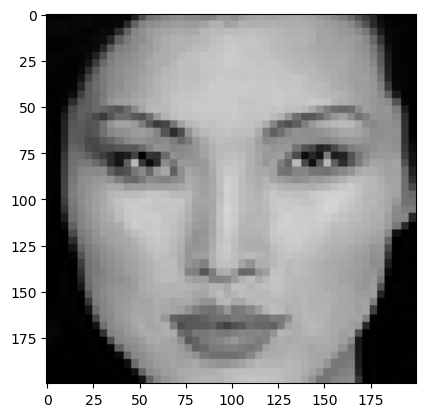

Expression Prediction: neutral


In [57]:
predict_image('C:/Users/Hp/Documents/Downloads/archive/data/val/6/28769.png')